# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних

---


🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.

Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('yulu_rental.csv', index_col=0)
df.head()

Saving yulu_rental.csv to yulu_rental (1).csv


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.index = pd.to_datetime(df.index)


# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

In [6]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,weekday,weekday_num,week,year,day
datetime,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,Saturday,5,52,2011,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,Saturday,5,52,2011,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,Saturday,5,52,2011,1
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,Saturday,5,52,2011,1
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,Saturday,5,52,2011,1


## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [7]:
monthlycount = df.resample('ME')['count'].mean()

<Axes: title={'center': 'динаміка оренд по місяцях за весь період'}, xlabel='місяць', ylabel='кількість оренд'>

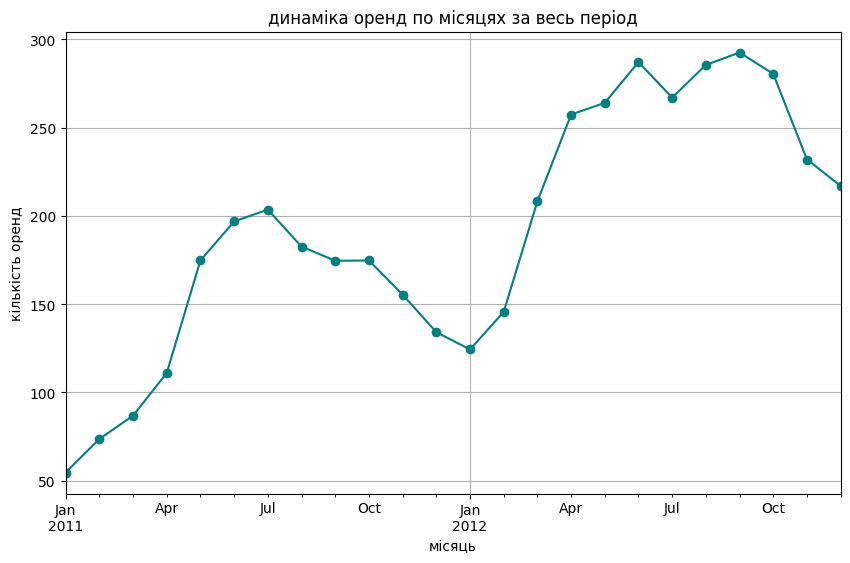

In [8]:
monthlycount.plot(
    kind='line',
    marker='o',
    figsize=(10,6),
    color='teal',
    xlabel='місяць',
    ylabel='кількість оренд',
    title='динаміка оренд по місяцях за весь період',
    grid=True
)

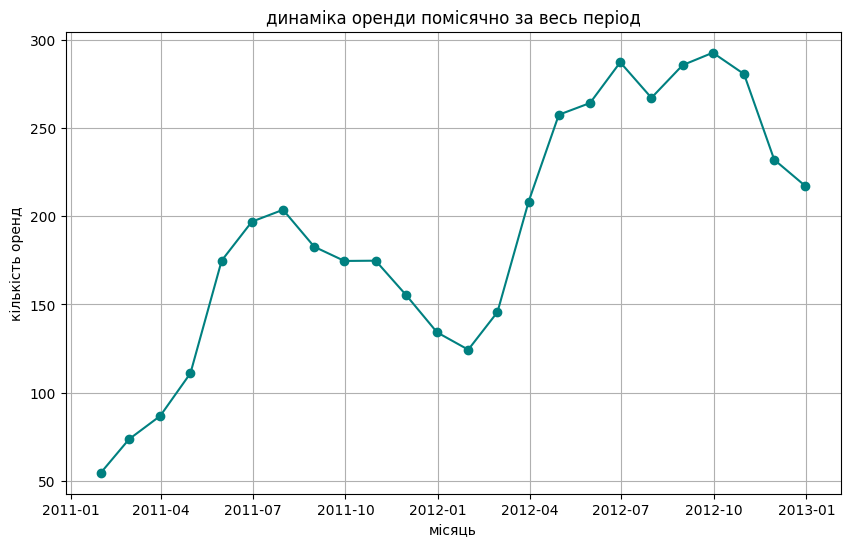

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(monthlycount, 'o-', color='teal')
plt.title('динаміка оренди помісячно за весь період')
plt.xlabel('місяць')
plt.ylabel('кількість оренд')
plt.grid(True);

In [10]:
# особисто мені більше до вподоби другий графік, побудований через matplotlib,
# візуально краще сприймається завдяки кращій сітці та компактнішому розміщенню
# позначок (при тому що розмір було задано однаковий - (10, 6))

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [11]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

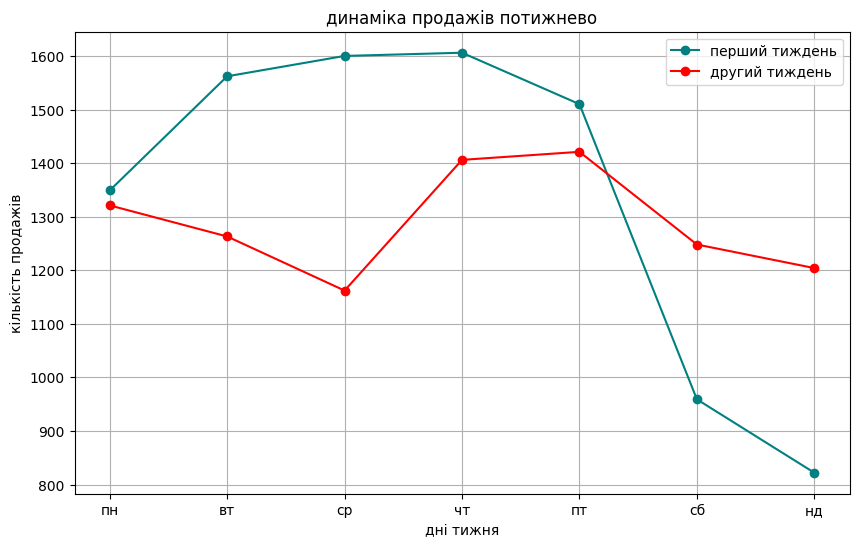

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(days, sales_week1, 'o-', color='teal', label='перший тиждень')
plt.plot(days, sales_week2, 'o-', color='red', label='другий тиждень')
plt.xticks(days, ['пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'нд'])
plt.grid(True)
plt.xlabel('дні тижня')
plt.ylabel('кількість продажів')
plt.title('динаміка продажів потижнево')
plt.legend()

In [13]:
# проаналізуємо, в який з тижнів показники продажів були стабільніші, за допомогою numpy

In [14]:
# для цього знайдемо різницю максимального і мінімального показника для кожного тижня,
# а також обчислимо стандартне відхилення (що менше цей показник - то стабільнішими є продажі)

In [15]:
salesweek1 = np.array(sales_week1)
salesweek2 = np.array(sales_week2)

print("тиждень 1:")
print("  стандартне відхилення:", round(np.std(salesweek1), 2))
print("  розмах:", salesweek1.max() - salesweek1.min())

print("\nтиждень 2:")
print("  стандартне відхилення:", round(np.std(salesweek2), 2))
print("  розмах:", salesweek2.max() - salesweek2.min())


тиждень 1:
  стандартне відхилення: 300.0
  розмах: 784

тиждень 2:
  стандартне відхилення: 90.91
  розмах: 259


In [16]:
# очевидним стає що продажі набагато стабільніші в другий тиждень
# там набагато нижчий показник і розмаху, і стандартного відхилення
# що повністю підтверджується візуально на графіку

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за кварталами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

In [17]:
monthlytemp = df.resample('ME')['temp'].mean()

In [18]:
quarterly = df.resample('QE')['count'].mean()

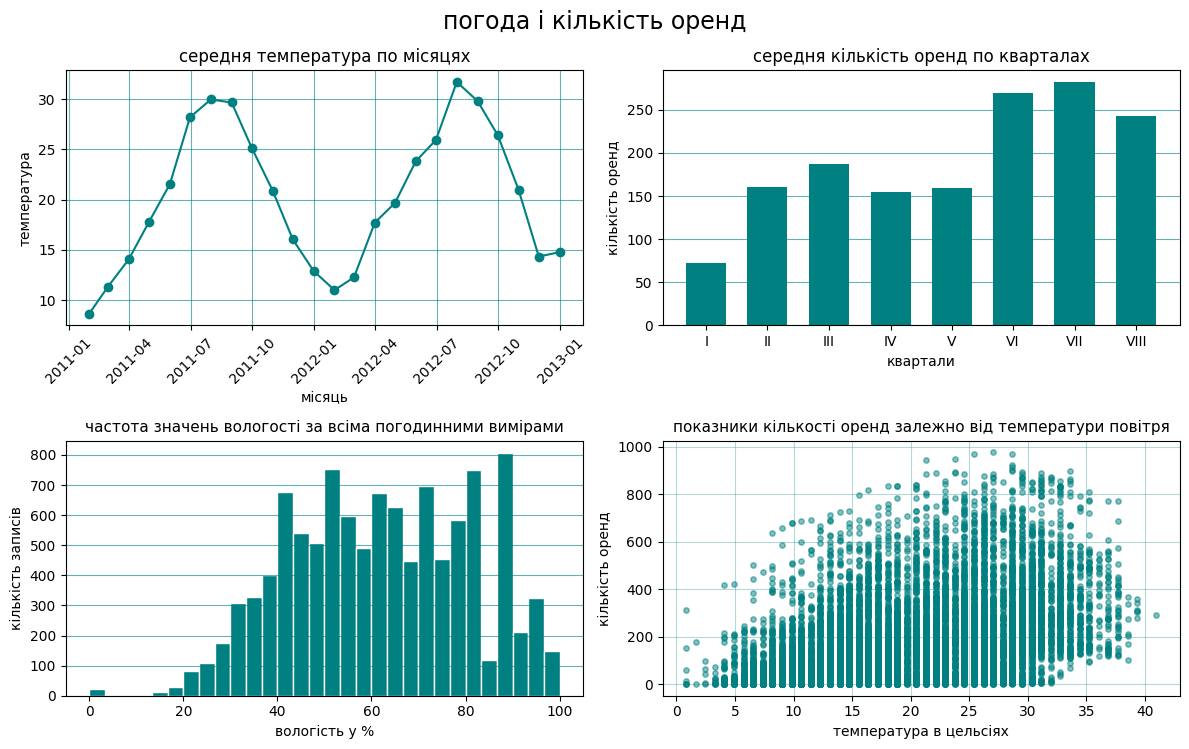

In [19]:
plt.figure(figsize=(12, 8))
plt.suptitle('погода і кількість оренд', fontsize=17,  y=0.93)

plt.subplot(2, 2, 1)
plt.plot(monthlytemp, 'o-', color='teal')
plt.title('середня температура по місяцях')
plt.xlabel('місяць')
plt.ylabel('температура')
plt.grid(True, color='teal', alpha=0.6)
plt.xticks(rotation=45);

plt.subplot(2, 2, 2)
plt.bar(quarterly.index, quarterly.values, width=60, color='teal')
plt.xticks(quarterly.index, ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII'])
plt.title('середня кількість оренд по кварталах')
plt.xlabel('квартали')
plt.ylabel('кількість оренд')
plt.grid(True, axis='y', linestyle='-', color='teal', alpha=0.6);


plt.subplot(2, 2, 3)
plt.hist(df['humidity'], bins=30, color='teal', edgecolor='white')
plt.title('частота значень вологості за всіма погодинними вимірами', fontsize=11)
plt.xlabel('вологість у %')
plt.ylabel('кількість записів')
plt.grid(True, axis='y', color='teal', alpha=0.6)


plt.subplot(2, 2, 4)
plt.scatter(df['temp'], df['count'], color='teal', s=15, alpha=0.5)
plt.title('показники кількості оренд залежно від температури повітря', fontsize=11)
plt.xlabel('температура в цельсіях')
plt.ylabel('кількість оренд')
plt.grid(True, color='teal', alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()









## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

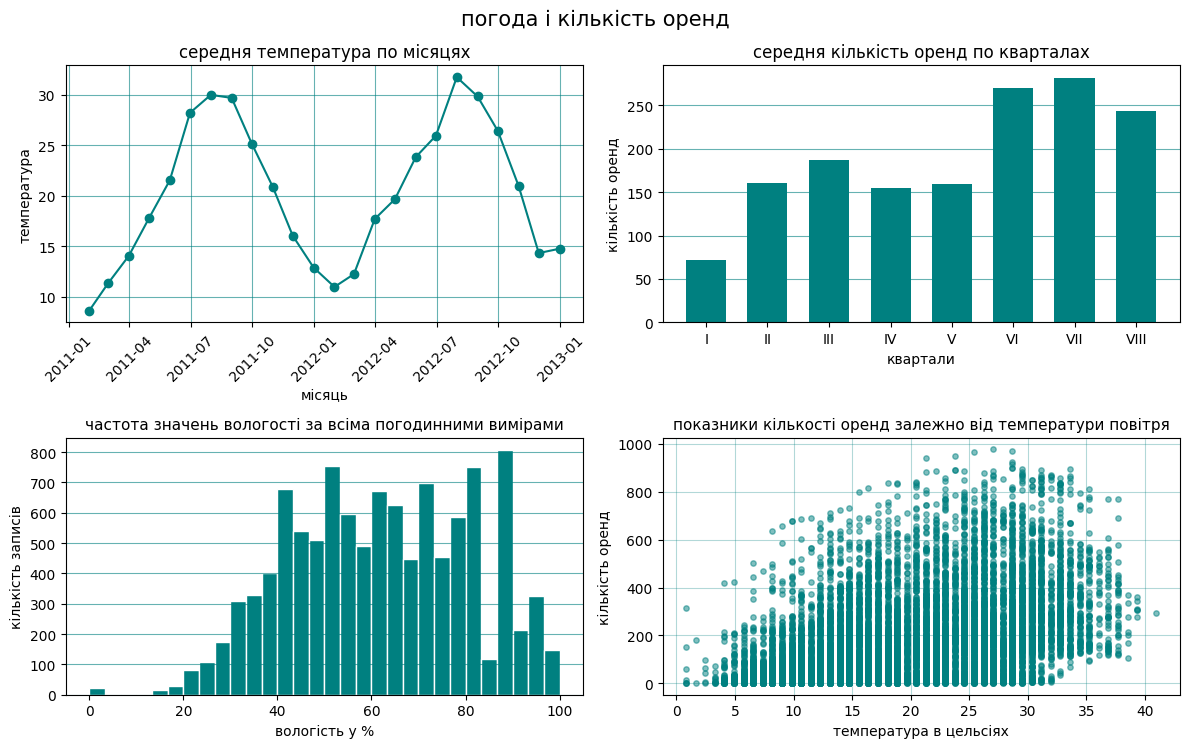

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
fig.suptitle('погода і кількість оренд', fontsize=15, y=0.93)

axes[0, 0].plot(monthlytemp, 'o-', color='teal')
axes[0, 0].set_title('середня температура по місяцях')
axes[0, 0].set_xlabel('місяць')
axes[0, 0].set_ylabel('температура')
axes[0, 0].grid(True, color='teal', alpha=0.6)
axes[0, 0].tick_params(axis='x', rotation=45)

axes[0, 1].bar(quarterly.index, quarterly.values, width=60, color='teal')
axes[0, 1].set_xticks(quarterly.index)
axes[0, 1].set_xticklabels(['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII'])
axes[0, 1].set_title('середня кількість оренд по кварталах')
axes[0, 1].set_xlabel('квартали')
axes[0, 1].set_ylabel('кількість оренд')
axes[0, 1].grid(True, axis='y', linestyle='-', color='teal', alpha=0.6)

axes[1, 0].hist(df['humidity'], bins=30, color='teal', edgecolor='white')
axes[1, 0].set_title('частота значень вологості за всіма погодинними вимірами', fontsize=11)
axes[1, 0].set_xlabel('вологість у %')
axes[1, 0].set_ylabel('кількість записів')
axes[1, 0].grid(True, axis='y', color='teal', alpha=0.6)

axes[1, 1].scatter(df['temp'], df['count'], color='teal', s=15, alpha=0.5)
axes[1, 1].set_title('показники кількості оренд залежно від температури повітря', fontsize=11)
axes[1, 1].set_xlabel('температура в цельсіях')
axes[1, 1].set_ylabel('кількість оренд')
axes[1, 1].grid(True, color='teal', alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [21]:
# ніби як в теорії методи відрізняються тим що в plt.subplots()
# потрібно більше прописувати вручну, і не можна швидко застосовувати зміни
# до декількох графіків одразу.
# але конкретно в цьому завданні це не дуже помітно, кількість коду фактично однакова
# я б навіть сказала що в plt.subplot() довелося писати ще більше.

## (Опціонально) Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

In [22]:
monthlystats = df['count'].resample('ME').agg(['mean', 'min', 'max'])

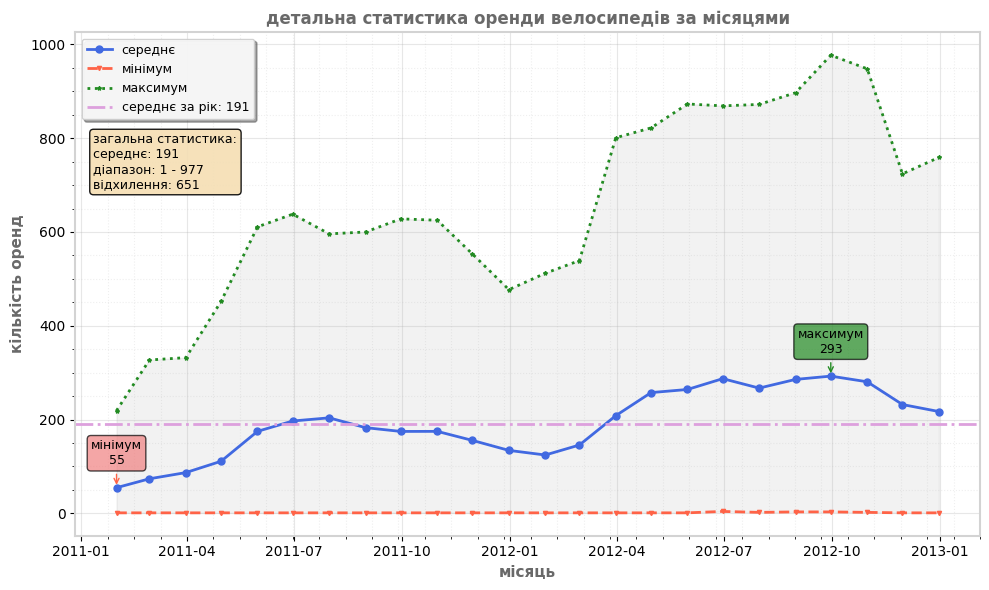

In [111]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(monthlystats.index, monthlystats['mean'], '-o', color='royalblue', linewidth=2, label='середнє', markersize=5)
ax.plot(monthlystats.index, monthlystats['min'], '--v', color='tomato', linewidth=2, label='мінімум', markersize=3)
ax.plot(monthlystats.index, monthlystats['max'], ':*', color='forestgreen', linewidth=2, label='максимум', markersize=3)

ax.fill_between(monthlystats.index, monthlystats['min'], monthlystats['max'], color='grey', alpha=0.1)

max_idx = monthlystats['mean'].idxmax()
max_val = monthlystats['mean'].max()
ax.annotate(f'максимум\n{max_val:.0f}',
            xy=(max_idx, max_val), xytext=(max_idx, max_val + 50),
            arrowprops=dict(arrowstyle='->', color='forestgreen', lw=1),
            fontsize=9, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='forestgreen', alpha=0.7))

min_idx = monthlystats['mean'].idxmin()
min_val = monthlystats['mean'].min()
ax.annotate(f'мінімум\n{min_val:.0f}',
            xy=(min_idx, min_val), xytext=(min_idx, min_val + 50),
            arrowprops=dict(arrowstyle='->', color='tomato', lw=1),
            fontsize=9, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='lightcoral', alpha=0.7))

overall_mean = monthlystats['mean'].mean()
ax.axhline(y=overall_mean, color='plum', linestyle='-.', linewidth=2,
           label=f'середнє за рік: {overall_mean:.0f}')

ax.grid(True, which='major', linestyle='-', alpha=0.3)
ax.grid(True, which='minor', linestyle=':', alpha=0.2)
ax.minorticks_on()

ax.legend(loc='upper left', fontsize=9, shadow=True, frameon=True, fancybox=True, framealpha=0.9)

textstr = (
    f'загальна статистика:\n'
    f'середнє: {monthlystats["mean"].mean():.0f}\n'
    f'діапазон: {monthlystats["min"].min():.0f} - {monthlystats["max"].max():.0f}\n'
    f'відхилення: {(monthlystats["max"] - monthlystats["min"]).mean():.0f}'
    )
props = dict(boxstyle='round', facecolor='wheat', alpha=0.9)
ax.text(0.02, 0.8, textstr, transform=ax.transAxes, fontsize=9,
        verticalalignment='top', bbox=props)

ax.set_title('детальна статистика оренди велосипедів за місяцями', fontweight = 'bold', color='dimgray')
ax.set_xlabel('місяць', fontsize=11, fontweight='bold', color='dimgray')
ax.set_ylabel('кількість оренд', fontsize=11, fontweight='bold', color='dimgray')

for spine in ax.spines.values():
    spine.set_linewidth(1.5)
    spine.set_color('lightgray')

plt.tight_layout()
plt.show()

In [112]:
# відповіді на питання

# усі три згадані функції вирішують схожі задачі:
# зменшують когнітивне навантаження та інформаційний шум,
# роблять графік цілісним об'єктом для сприйняття
# (вся важлива інформація зібрана в одному місці,
# а візуальні ефекти типу fill_between() підкреслюють головні аспекти
# на зображенні, додають контекст, підсвічують основні зони інтересу),
# тобто більш читабельним, інтуїтивно зрозумілим (що знімає потребу витрачати час
# на попереднє ознайомлення з таблицями/графіками в окремому місці, яке робить
# аналіз графіка більш дискомфортним та ресурсозатратним)